__Titanic Survival Analysis__

# Importing Libraries

In [1]:
import pandas as pd      
import numpy as np      # For DataFrame
from sklearn import tree
from sklearn import preprocessing     # Used to convert text to numeric value


# Reading data

In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Handling Missing Values

In [3]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Replacing null values from Age Column

In [4]:
titanic_train ["Age"].mean()

32.69985376827896

In [5]:
new_age_var = np.where(titanic_train["Age"].isnull(),32,titanic_train["Age"])

In [6]:
titanic_train["Age"]=new_age_var

## Converting Text features to Binary / Numeric using label encoder

In [7]:

label_encoder = preprocessing.LabelEncoder()    # to convert text to numeric

encoded_sex=label_encoder.fit_transform(titanic_train["Sex"])   # to transform text to numerical


### Creating a Model - Generating first decision tree


##### Model 1

In [8]:
tree_model=tree.DecisionTreeClassifier()

In [9]:
tree_model.fit(X=pd.DataFrame(encoded_sex),y=titanic_train["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
with open("Dtree1.dot", 'w') as f:	# 'w' = to write # Dv = Survived # IDV = Sex
    f = tree.export_graphviz(tree_model,feature_names=["Sex"],out_file=f);

_____________________________

#### Model 2

In [11]:
predictors = pd.DataFrame([encoded_sex, titanic_train["Pclass"]]).T 	# 2 IDV created

In [12]:
tree_model.fit(X=predictors, y=titanic_train["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
with open("Dtree2.dot", 'w') as f:
    f = tree.export_graphviz(tree_model,feature_names=["Sex", "Pclass"],out_file=f);


__________________________

##### Model 3

In [14]:
predictors = pd.DataFrame([encoded_sex, titanic_train["Pclass"],titanic_train["Age"],titanic_train["Fare"]]).T

In [15]:
tree_model = tree.DecisionTreeClassifier(max_depth=8) 
# to get the higher accuracy score for classifying score "max_depth = 8" is defined. 
# value can be anything else.


In [16]:
tree_model.fit(X=predictors, y=titanic_train["Survived"]) #To check the fitness of model.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
with open("Dtree3.dot", 'w') as f:
    f = tree.export_graphviz(tree_model,feature_names=["Sex", "Pclass", "Age", "Fare"],out_file=f);


_________________________________________

# Checking accuracy of Model

In [19]:
tree_model.score(X=predictors, y=titanic_train["Survived"])


0.8976377952755905

_______________________

# Testing the Model with Test Dataset:

In [20]:
# Read the data in python


titanic_test=pd.read_csv("test.csv")

In [21]:
new_age_var = np.where(titanic_test["Age"].isnull(),28,titanic_test["Age"])
titanic_test['Age']=new_age_var

In [22]:
enoded_sex_test=label_encoder.fit_transform(titanic_test["Sex"])

In [23]:
test_features=pd.DataFrame([enoded_sex_test,titanic_test["Pclass"], titanic_test["Age"], titanic_test["Fare"]]).T

In [24]:
test_preds=tree_model.predict(X=test_features)     
# tree_model is training data - based on which we are going to predict the accuracy of test data


___________

In [25]:
Predicted_Output=pd.DataFrame({"PassengerId":titanic_test["PassengerId"], "Survived":test_preds})


In [26]:
Predicted_Output.to_csv("Output.csv",index=False); # to convert the result in .csv file.

______________

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
titanic_train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
label_encoder=preprocessing.LabelEncoder()
titanic_train["Sex"]=label_encoder.fit_transform(titanic_train["Sex"])

In [30]:
titanic_train["Embarked"]=label_encoder.fit_transform(titanic_train["Embarked"])


In [31]:
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)


_______________

# Initializing Model

In [32]:
features=["Sex","Pclass","SibSp", "Embarked", "Age","Fare"]

In [33]:
rf_model.fit(X=titanic_train[features], y=titanic_train["Survived"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
print("OOB Accuracy:")
print(rf_model.oob_score_);


OOB Accuracy:
0.813273340832396


In [35]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp);


Sex 0.2696645289995523
Pclass 0.08952660966188289
SibSp 0.05234348482985876
Embarked 0.03393792481947257
Age 0.26904320876739457
Fare 0.285484242921839


________________

# "Project 1 -  Building Decision Tree for Titanic Survival Analysis.ipynb"

Project 1:
Build Decision Tree 
DV - Survived
IDV - Gender/Sex, Age, Fare
and Prediction
check the Accuracy using Decision Tree algorithm.

##### Model 4

In [65]:
predictors = pd.DataFrame([encoded_sex,titanic_train["Age"],titanic_train["Fare"]]).T

In [66]:
tree_model = tree.DecisionTreeClassifier(max_depth=12) 
# to get the higher accuracy score for classifying score "max_depth = 12" is defined. 
# value can be anything else.


In [67]:
tree_model.fit(X=predictors, y=titanic_train["Survived"]) #To check the fitness of model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Creating a Decision Tree

In [68]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


In [69]:
with open("Dtree4.dot", 'w') as f:
    f = tree.export_graphviz(tree_model,feature_names=["Sex", "Age", "Fare"],out_file=f);


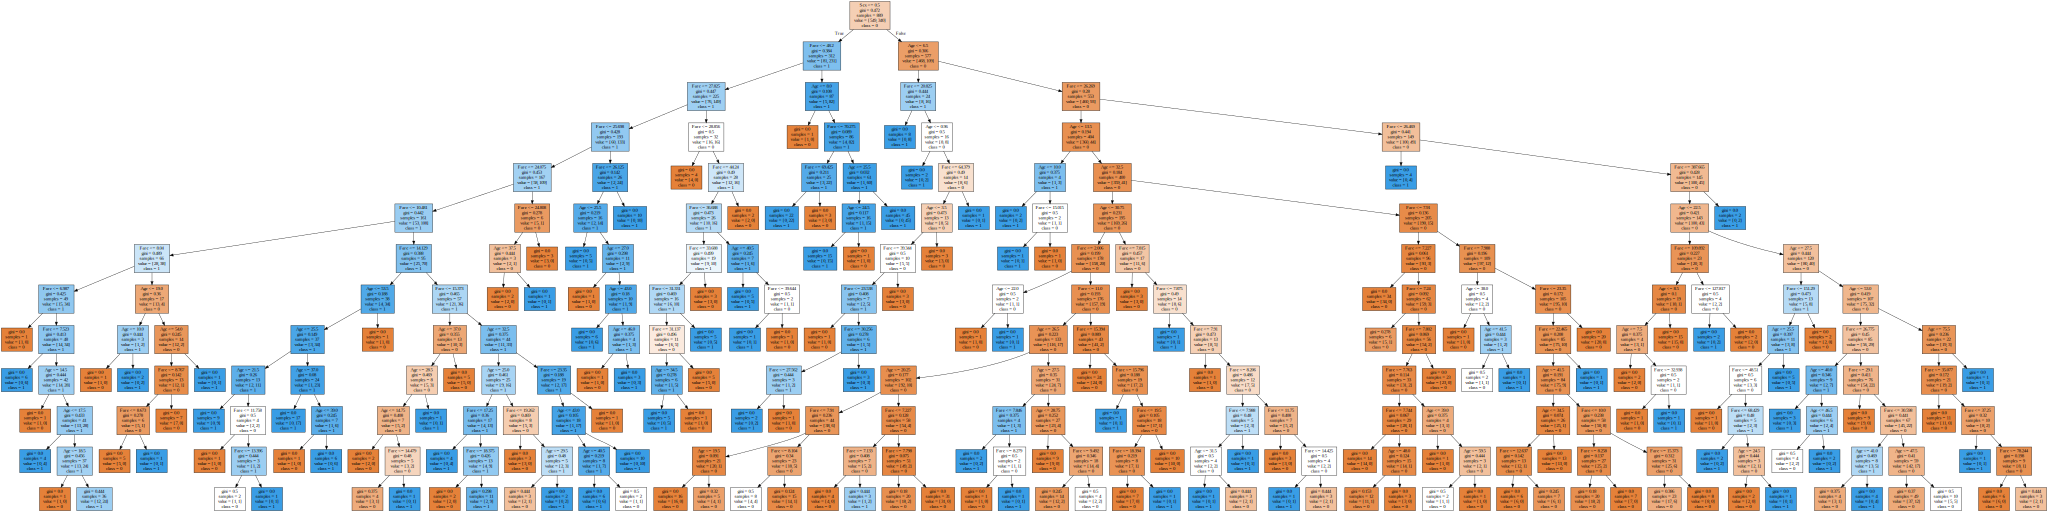

In [71]:
graph = Source(tree.export_graphviz(tree_model, out_file=None, feature_names=[ 'Sex', 'Age', 'Fare'],
        class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))


##### Checking accuracy of Model

In [72]:
tree_model.score(X=predictors, y=titanic_train["Survived"])

0.9246344206974129

# Testing the Model with Test Dataset:

In [73]:
# Read the data in python


titanic_test=pd.read_csv("test.csv")

In [74]:
new_age_var = np.where(titanic_test["Age"].isnull(),28,titanic_test["Age"])
titanic_test['Age']=new_age_var

In [75]:
enoded_sex_test=label_encoder.fit_transform(titanic_test["Sex"])

In [76]:
test_features=pd.DataFrame([enoded_sex_test, titanic_test["Age"], titanic_test["Fare"]]).T

In [77]:
test_preds=tree_model.predict(X=test_features)     
# tree_model is training data - based on which we are going to predict the accuracy of test data


In [78]:
Predicted_Output.to_csv("Output1.csv",index=False); # to convert the result in .csv file

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
label_encoder=preprocessing.LabelEncoder()
titanic_train["Sex"]=label_encoder.fit_transform(titanic_train["Sex"])

In [82]:
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

# Initializing Model

In [83]:
features=["Sex", "Age","Fare"]

In [84]:
rf_model.fit(X=titanic_train[features], y=titanic_train["Survived"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

##### Checking Accuracy

In [85]:
print("OOB Accuracy:")
print(rf_model.oob_score_);


OOB Accuracy:
0.7930258717660292


In [86]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp);

Sex 0.2817187325825916
Age 0.28701467383625356
Fare 0.43126659358115493


_________________________